## Boosting Method

***It is also a homogeneous weak learners’ model but works differently from Bagging. In this model, learners learn sequentially and adaptively to improve model predictions of a learning algorithm. It aim to decrease bias.***

![Booasting.PNG](attachment:Booasting.PNG)

***Task is to check deaths information from the Titanic accident..***

# Data Details
***The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).***

### Read the dataset

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_df = pd.read_csv('train.csv')
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_df = pd.read_csv('test.csv')
test_df


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Removing unnecesaary data
train_df.drop("PassengerId", inplace=True, axis=1)
test_df.drop("PassengerId", inplace=True, axis=1)

In [ ]:
def string_to_numerical_features(df):
    df['Sex'].replace('male', 0, inplace=True)
    df['Sex'].replace('female', 1, inplace=True)

    df['Embarked'].replace('Q', 0, inplace=True)
    df['Embarked'].replace('S', 1, inplace=True)
    df['Embarked'].replace('C', 2, inplace=True)
    
string_to_numerical_features(train_df)
string_to_numerical_features(test_df)
train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


In [ ]:
# Also the cabin, ticket,name seems not to be useful so we remove
# these columns too

train_df.drop(["Cabin","Ticket","Name"],inplace=True, axis=1)
test_df.drop(["Cabin","Ticket","Name"],inplace=True, axis=1)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [ ]:
train_df.drop(["Age","Embarked"],inplace=True, axis=1)
test_df.drop(["Age","Embarked"],inplace=True, axis=1)

In [ ]:
# Target variable
# Pre-Modeling Tasks
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

### Spliting the dataset in training & test dataset

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.30)

Accuracy of the GBM on test set: 0.799
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       168
           1       0.74      0.70      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



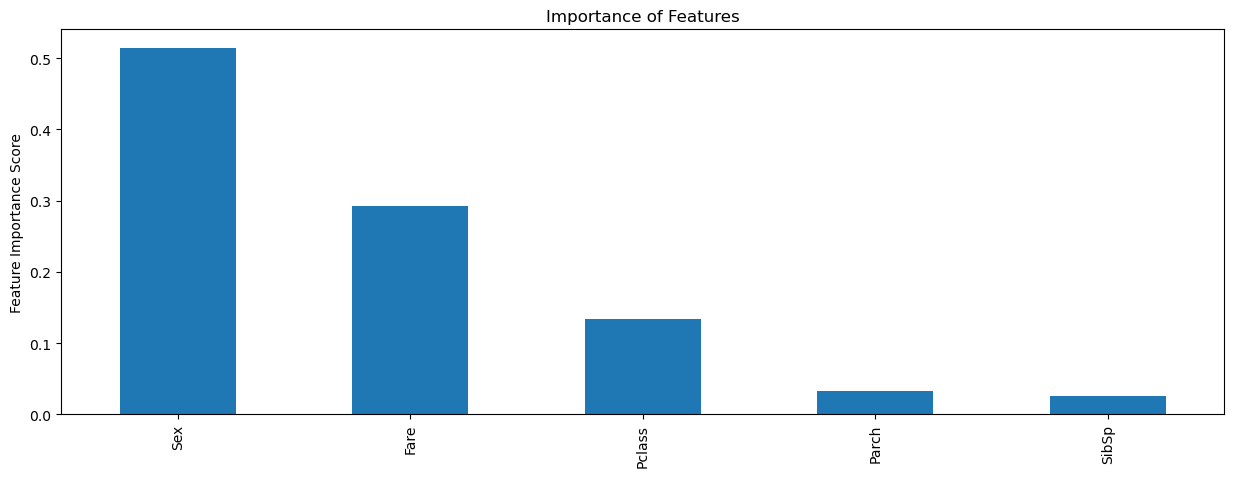

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)

predictors=list(X_train)


plt.figure(figsize=(15, 5))


feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In GBM Model, first we tune the combination of **learning rate & # of trees**, then we tune the remaining hyperparameters

In [ ]:
p_test3 = {'learning_rate':[0.1, 0.01, 0.001], 'n_estimators':[8, 16, 32]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
            param_grid = p_test3, scoring='roc_auc', n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 32}, 0.8292835212728038)

In [ ]:
p_test2 = {'learning_rate':[0.1], 
           'n_estimators':[32],
           'max_depth':[8, 16],
           'min_samples_split':[2, 4, 8],
           'min_samples_leaf':[2, 4],
           'max_features':[5, 6],
           'subsample':[0.7, 0.8, 0.9]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(random_state=10), 
            param_grid = p_test2, scoring='roc_auc', n_jobs=4, cv=3)
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1,
  'max_depth': 16,
  'max_features': 5,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 32,
  'subsample': 0.7},
 0.8194262175561388)

Accuracy of the GBM on test set: 0.832
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       168
           1       0.77      0.79      0.78       100

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



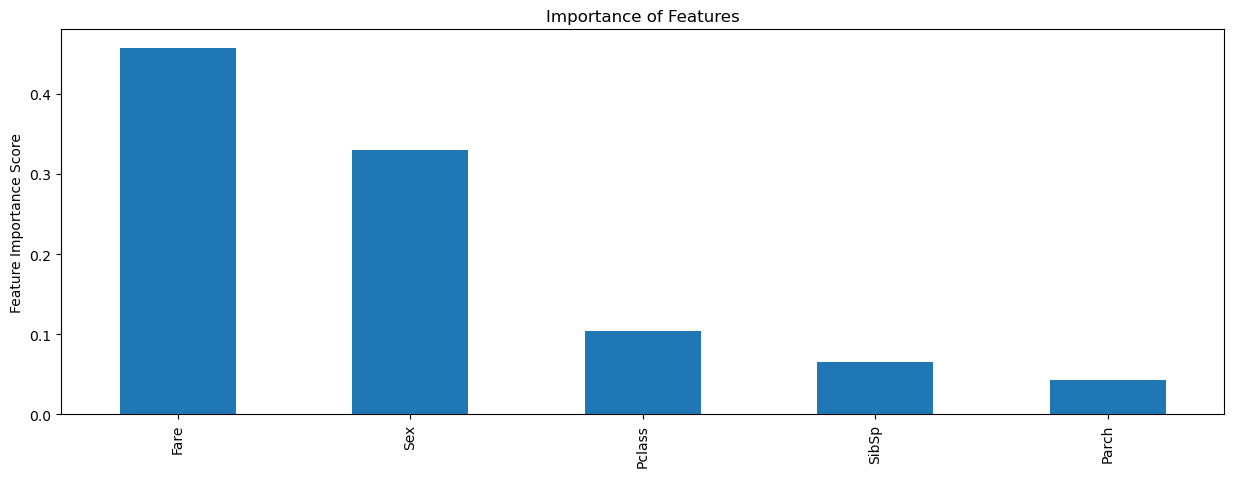

In [ ]:
new = GradientBoostingClassifier(learning_rate=0.1, n_estimators=32, max_depth=16, min_samples_split=2,
                               min_samples_leaf=2, max_features=4 , subsample=0.8, random_state=10)
new.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

In [ ]:
# Predicting the Test set results
y_pred_best = new.predict(X_test)
# Predict probabilities
probs_y_best = new.predict_proba(X_test)
probs_y_best = np.round(probs_y_best, 2)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred_best) 
print(cm)

[[144  24]
 [ 21  79]]


In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred_best))
print('Recall: %.3f' % recall_score(y_test, y_pred_best))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_best))
print('F1 Score: %.3f' % f1_score(y_test, y_pred_best))

Precision: 0.767
Recall: 0.790
Accuracy: 0.832
F1 Score: 0.778


In [ ]:
# Predicting the Train set results
X_pred_best = new.predict(X_train)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
cm = confusion_matrix(y_train, X_pred_best)
print(cm)

print('Precision: %.3f' % precision_score(y_train, X_pred_best))
print('Recall: %.3f' % recall_score(y_train, X_pred_best))

[[362  19]
 [ 31 211]]
Precision: 0.917
Recall: 0.872


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

#run models
baseline = GradientBoostingClassifier(random_state=10)
baseline.fit(X_train,y_train)

model1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=16, random_state=10)
model1.fit(X_train,y_train)

new=GradientBoostingClassifier(learning_rate=0.1, n_estimators=32, max_depth=16, min_samples_split=2,
                               min_samples_leaf=2, max_features=4 , subsample=0.8, random_state=10)
new.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=16, max_features=4, min_samples_leaf=2,
                           n_estimators=32, random_state=10, subsample=0.8)

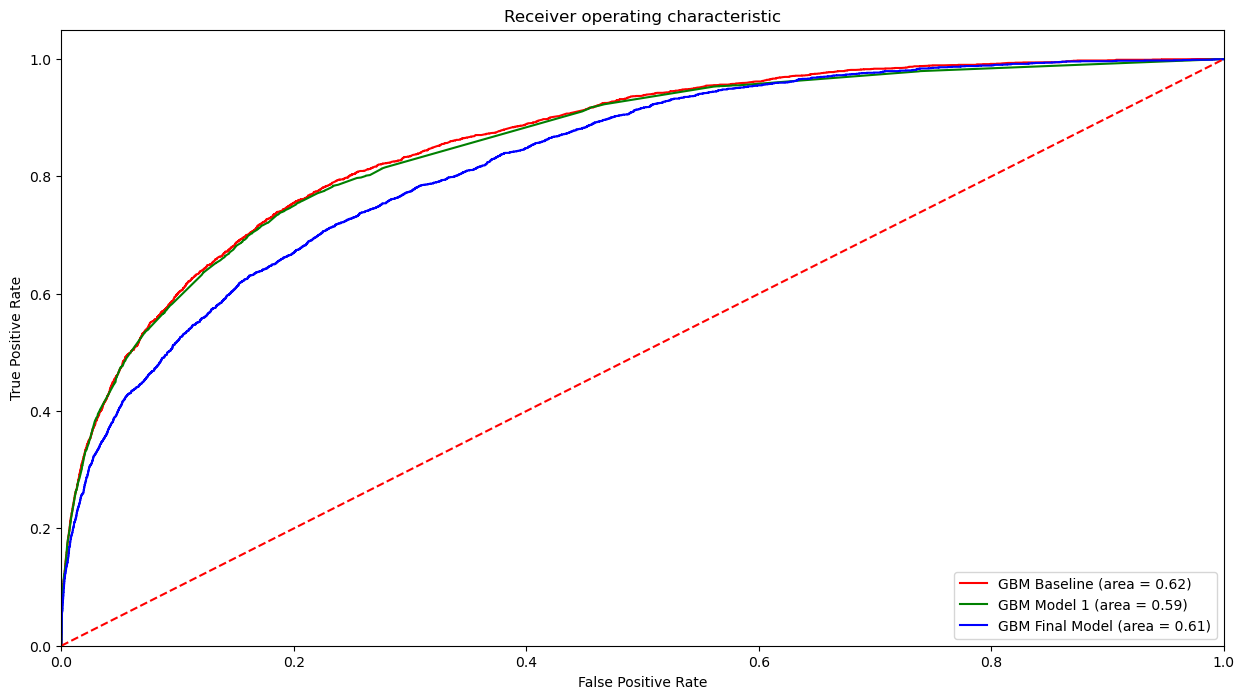

In [ ]:
#calculate values for ROC AUC plot
#baseline model
baseline_roc_auc = roc_auc_score(y_test, baseline.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, baseline.predict_proba(X_test)[:,1])
#model 1
model1_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr1, tpr1, thresholds1 = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure(figsize=(15,8))
plt.plot(fprB, tprB, c='r', label='GBM Baseline (area = %0.2f)' % baseline_roc_auc)
plt.plot(fpr1, tpr1, c='g', label='GBM Model 1 (area = %0.2f)' % model1_roc_auc)
plt.plot(fprnew, tprnew, c ='b', label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()